# Pymaceuticals Inc.
---

### Analysis

- Compared to the drug regimens tested, Capomulin was among the lowest in mean and median tumor volume, as well as standard deviation and standard error. The low standard error suggests that these results are likely representative of the results we would see for the population, and the low tumor volume suggests that the drug may have been successful at reducing tumor volume. 

- Capomulin is comparible to Ramicane in its ability to reduce tumor volume compared to the rest of the drug regimens. 

- The correlation between mouse weight and tumor volume for Capomulin is 0.84, which is high. This suggests that tumor volume increases as the weight of the mouse increases and decreases as the weight of the mouse decreases. 

- Comparing Capomulin's results to 3 other drug regimens - Ramicane, infubinol, and Ceftamin - only Infubinol had outliers. This indicates that the results were fairly consistent across each mouse taking the same drug regimen. 

- Pulling data from a single mouse from the Capomulin regimen sample population, tumor volume increased until day 20, peaking at 48 (mm3) before dropping to its smallest volume, just over 40 (mm3). This is a 16% reduction from the peak, but only an 11% reduction from the starting volume. Without a longer duration study, it is unclear whether this trend would continue until the tumor was reduced to 0 (mm3). 

- Overall, Capomulin shows some promising results in its ability to lower tumor volume in mice over a 45 day trial, but further testing and analysis is needed to determine if these results would continue over a longer trial period. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_study_data = pd.merge(study_results, mouse_metadata, on = "Mouse ID")

# Display the data table for preview
combined_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Check the number of mice.
combined_study_data["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#Find the location of mice with duplicated Mouse ID and Timepoint values. Then store the Mouse ID. Then shows only the unique responses
duplicate_data = combined_study_data.loc[combined_study_data.duplicated(["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_data

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_study_data.loc[combined_study_data["Mouse ID"] == duplicate_data[0], :]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = combined_study_data[combined_study_data["Mouse ID"] != duplicate_data[0]].sort_values(["Timepoint"])
#clean_mouse_df = combined_study_data.drop(combined_study_data["Mouse ID"] == duplicate_data[0])
clean_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1195,v409,0,45.0,0,Placebo,Female,16,25
1579,u946,0,45.0,0,Propriva,Male,5,30
1193,w140,0,45.0,0,Zoniferol,Female,19,30
227,a577,0,45.0,0,Infubinol,Female,6,25


In [6]:
# Check the number of mice in the clean DataFrame.
clean_mouse_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# columns = ["Mean Tumor Volume", 
#            "Median Tumor Volume",
#            "Tumor Volume Variance",
#            "Tumor Volume Std. Dev.",
#            "Tumor Volume Std. Err."]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_mean = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_median = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_variance = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_stdev = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_sem = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


# #clean_mouse_df.describe()
# clean_mouse_df.groupby("Drug Regimen")
# clean_mouse_df

# Assemble the resulting series into a single summary DataFrame.
mouse_summary_df = pd.DataFrame({"Mean Tumor Volume": drug_mean,
                               "Median Tumor Volume": drug_median,
                               "Tumor Volume Variance": drug_variance,
                               "Tumor Volume Std. Dev.": drug_stdev,
                               "Tumor Volume Std. Err.": drug_sem})

mouse_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_summary_agg = clean_mouse_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median", "var", "std", "sem"])
mouse_summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: title={'center': '# of Observed Mouse Timepoints Across Drug Regimens'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

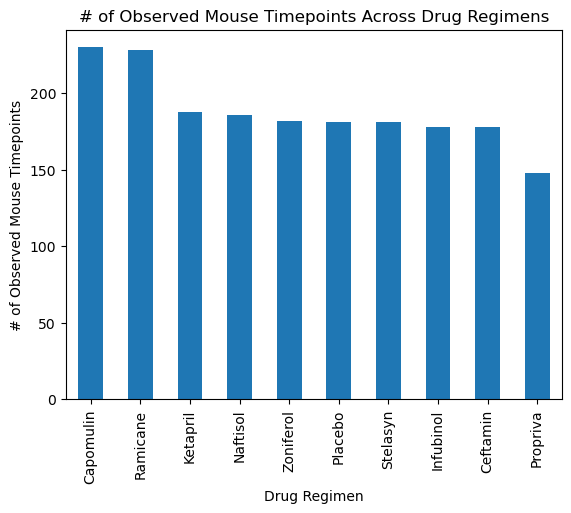

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints = clean_mouse_df["Drug Regimen"].value_counts()
fig_one = timepoints.plot(kind="bar")

fig_one.set_xlabel("Drug Regimen")
fig_one.set_ylabel("# of Observed Mouse Timepoints")
fig_one.set_title("# of Observed Mouse Timepoints Across Drug Regimens")
fig_one

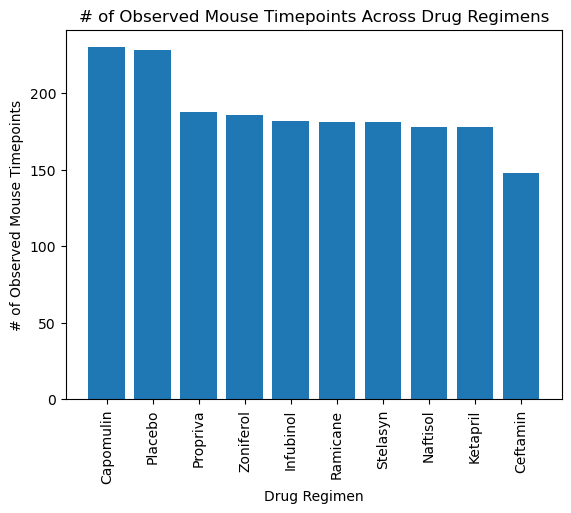

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import numpy as np

timepoints = clean_mouse_df["Drug Regimen"].value_counts()
x_axis = np.arange(len(timepoints))
drugs = clean_mouse_df["Drug Regimen"].unique()
tick_locations = [value for value in x_axis]

plt.bar(x_axis, timepoints)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

#the order is incorrect for the x-labels
plt.xticks(tick_locations, drugs, rotation = "vertical")
plt.title("# of Observed Mouse Timepoints Across Drug Regimens")
plt.show()

<Axes: title={'center': 'Mouse Distribution by Sex'}, ylabel='Sex'>

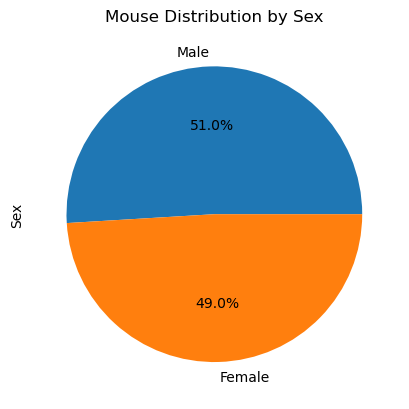

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_data = clean_mouse_df["Sex"].value_counts()
fig_two = pie_data.plot(kind="pie", autopct ="%1.1f%%")

fig_two.set_ylabel("Sex")
fig_two.set_title("Mouse Distribution by Sex")
fig_two

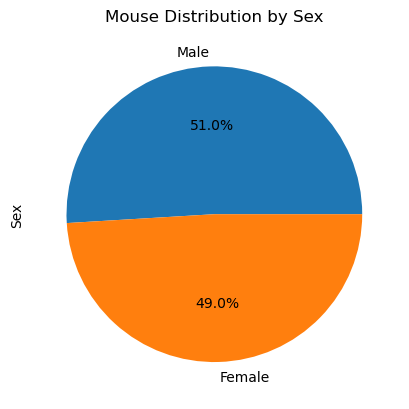

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_data = clean_mouse_df["Sex"].value_counts()
plt.pie(pie_data, autopct ="%1.1f%%", labels = pie_data.index.values)

plt.ylabel("Sex")
plt.title("Mouse Distribution by Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
end_time = clean_mouse_df.groupby("Mouse ID")["Timepoint"].max()
end_time = end_time.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
end_tumor_vol = pd.merge(end_time, clean_mouse_df, on=["Mouse ID", "Timepoint"], how = "left")
end_tumor_vol

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

#Loop will return all the values for each drug, one by one. (4 loops). IQR to be returned for each drug regimen.
for drug in regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes   
    end_tumor_sel_regimen = end_tumor_vol.loc[end_tumor_vol["Drug Regimen"] == drug]
    tumor_vol_df = end_tumor_sel_regimen["Tumor Volume (mm3)"]


    tumor_vol_list.append(tumor_vol_df)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    #end_tumor_sel_regimen
    quartiles = tumor_vol_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_vol_df.loc[(tumor_vol_df < lower_bound) | (tumor_vol_df > upper_bound)]
    
    #Print outliers for each drug type in specified regimen list
    print(f"{drug}'s potential outliers: {outliers}")
#print(tumor_vol_list)

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


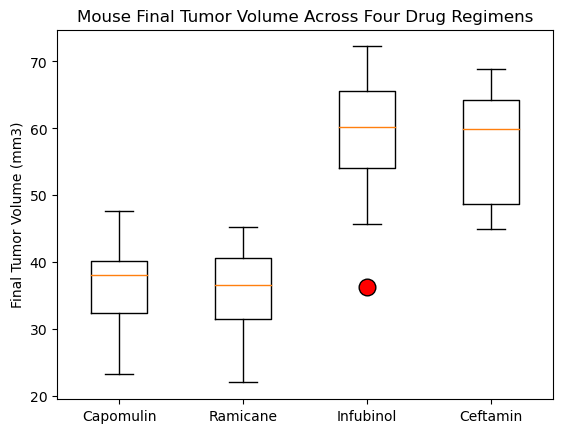

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol_list,flierprops = dict(markerfacecolor = "r", markersize = 12))
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1,2,3,4], regimens)
plt.title("Mouse Final Tumor Volume Across Four Drug Regimens")

plt.show()

## Line and Scatter Plots

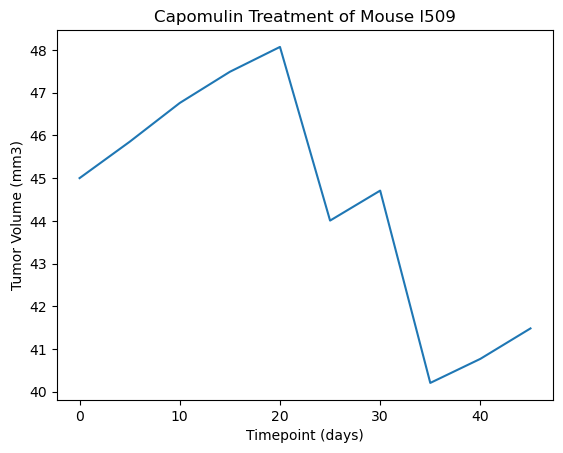

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_mice = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin",:]

#I'm choosing mouse l509 to match the results from the assignment, but any mouse from the Capomulin_mice dataframe could be used
#I could also set up a random generator to select a mouse from that list, but for simplicity, I will just hand select
mouse = capomulin_mice.loc[capomulin_mice["Mouse ID"] == "l509", :]

time = mouse["Timepoint"]
mouse_tum_vol = mouse["Tumor Volume (mm3)"]

plt.title("Capomulin Treatment of Mouse l509")
plt.plot(time, mouse_tum_vol)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

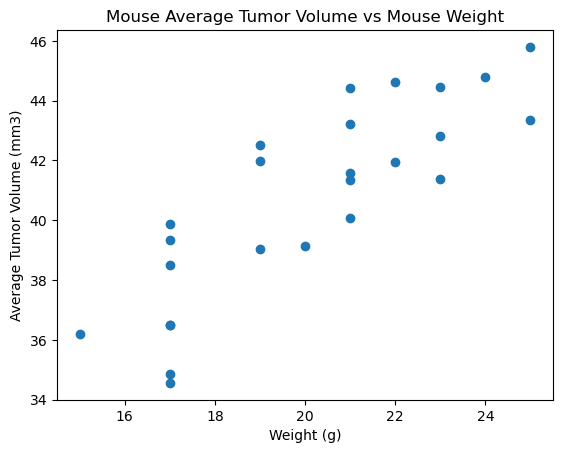

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_cap_vol = capomulin_mice.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
avg_cap_weight = capomulin_mice.groupby("Mouse ID")["Weight (g)"].mean()
#each individaul mouse
#display its weight
#display its average tumor volume across all timestamps

plt.scatter(avg_cap_weight, avg_cap_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Average Tumor Volume vs Mouse Weight")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


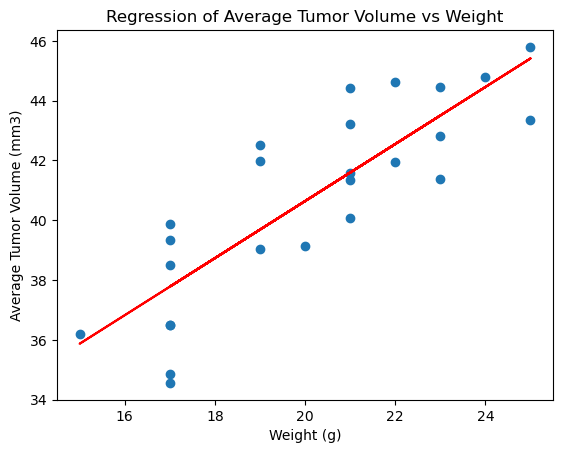

In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_co = round(st.pearsonr(avg_cap_weight,avg_cap_vol)[0],2)

print(f"The correlation between mouse weight and the average tumor volume is {correlation_co}")
#call values for linear regression from scipy
(t_slope, t_inter, t_r, t_p, t_std_err) = st.linregress(avg_cap_weight,avg_cap_vol)
t_line = t_slope*avg_cap_weight + t_inter

plt.scatter(avg_cap_weight, avg_cap_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(avg_cap_weight, t_line, color = "r")
plt.title("Regression of Average Tumor Volume vs Weight")

plt.show()